In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('future.no_silent_downcasting', True)
              
def load_our_data_cat():
    # charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
    %run init_notebook.py

    X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
    X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
    y_train = pd.read_csv(base_processed + 'y_train_cat.csv')
    y_test = pd.read_csv(base_processed + 'y_test_cat.csv')
    X_train_scaled = X_train_scaled.replace({False: 0, True: 1}).astype(float)
    X_test_scaled = X_test_scaled.replace({False: 0, True: 1}).astype(float)
    #
    y_column = "categorie"
    y_train = y_train[y_column]
    y_test = y_test[y_column]
    return X_train_scaled, X_test_scaled, y_train, y_test

In [2]:
X_train_scaled, X_test_scaled, y_train, y_test = load_our_data_cat()
X_train_scaled.head()

,m (kg),W (mm),At1 (mm),ec (cm3),ep (KW),z (Wh/km),Electric range (km),IT28,IT29,IT32,...,IT39,Ft_diesel/electric,Ft_petrol,Ft_petrol/electric,Cr_M1G,Cr_M1S,Cr_N1G,Fm_H,Fm_M,Fm_P
0,0.198770,-0.278049,0.758065,-1.279678,0.066667,0.400391,0.116883,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.967213,0.190244,0.677419,0.032193,1.777778,0.376953,0.113173,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.081967,0.243902,0.096774,0.000000,0.711111,0.000000,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.034836,-0.526829,0.193548,0.032193,0.555556,0.000000,0.000000,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.372951,-0.590244,0.241935,-1.547284,-0.422222,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Initialisation des modèles
gbm_model = lgb.LGBMClassifier(random_state=42)

# Entraînement des modèles
gbm_model.fit(X_train_scaled, y_train)

# Prédictions
gbm_preds = gbm_model.predict(X_test_scaled)

# Évaluation
model = {'LightGBM': gbm_preds}

acc = accuracy_score(y_test, gbm_preds)
f1 = f1_score(y_test, gbm_preds, average='weighted')
print(f"LightGBM -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")
print(classification_report(y_test, gbm_preds))

C:\Users\vguil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vguil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\vguil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vguil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\vguil\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1407
[LightGBM] [Info] Number of data points in the train set: 98939, number of used features: 19
[LightGBM] [Info] Start training from score -2.169258
[LightGBM] [Info] Start training from score -2.804412
[LightGBM] [Info] Start training from score -1.392733
[LightGBM] [Info] Start training from score -1.517099
[LightGBM] [Info] Start training from score -1.572129
[LightGBM] [Info] Start training from score -2.271626
[LightGBM] [Info] Start training from score -3.063892
LightGBM -> Accuracy: 0.8888, F1-score: 0.8886
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2887
         2.0       0.80      0.75

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Modèle LightGBM de base
lgb_clf = lgb.LGBMClassifier()

# Refaire un modèle LightGBM avec tuning des hyperparamètres
params = {
    'n_estimators': [100, 300, 500],   # Nombre d'arbres
    'learning_rate': [0.01, 0.05, 0.1], # Taux d'apprentissage
    'max_depth': [5, 10, 15],          # Profondeur max des arbres
    'num_leaves': [20, 31, 50],        # Nombre de feuilles max
    'min_child_samples': [10, 20, 50], # Taille min des feuilles
    'colsample_bytree': [0.7, 0.9, 1]  # Fraction de colonnes utilisées par arbre
}

# RandomizedSearch pour accélérer le tuning
random_search = RandomizedSearchCV(
    lgb_clf, 
    params, 
    n_iter=30,  # On teste seulement 30 combinaisons aléatoires
    cv=3, 
    scoring='f1_weighted', 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

# Meilleur modèle et évaluation
best_lgb = random_search.best_estimator_
print("Meilleurs paramètres LightGBM:", random_search.best_params_)

y_pred = best_lgb.predict(X_test_scaled)
y_pred_proba = best_lgb.predict_proba(X_test_scaled)

print("Nouveau Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1407
[LightGBM] [Info] Number of data points in the train set: 98939, number of used features: 19
[LightGBM] [Info] Start training from score -2.169258
[LightGBM] [Info] Start training from score -2.804412
[LightGBM] [Info] Start training from score -1.392733
[LightGBM] [Info] Start training from score -1.517099
[LightGBM] [Info] Start training from score -1.572129
[LightGBM] [Info] Start training from score -2.271626
[LightGBM] [Info] Start training from score -3.063892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

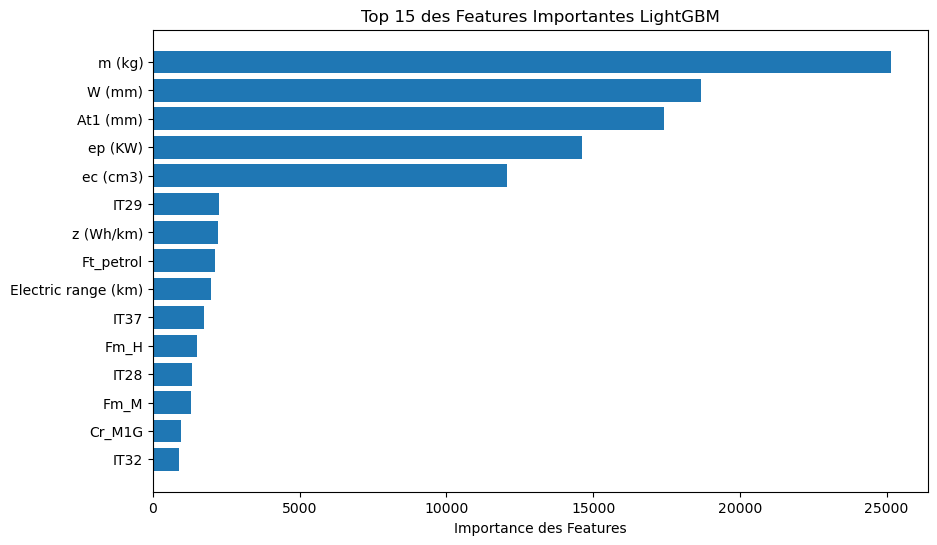

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Récupérer l'importance des features
feature_importances = best_lgb.feature_importances_

# Récupérer les noms des features (si tes colonnes ont des noms)
feature_names = X_train_scaled.columns  

# Trier par importance
sorted_idx = np.argsort(feature_importances)[::-1]  # Tri décroissant
top_n = 15  # Nombre de features à afficher

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[sorted_idx][:top_n], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in sorted_idx[:top_n]])
plt.xlabel("Importance des Features")
plt.title("Top 15 des Features Importantes LightGBM")
plt.gca().invert_yaxis()  # Inverser pour voir la plus importante en haut
plt.show()

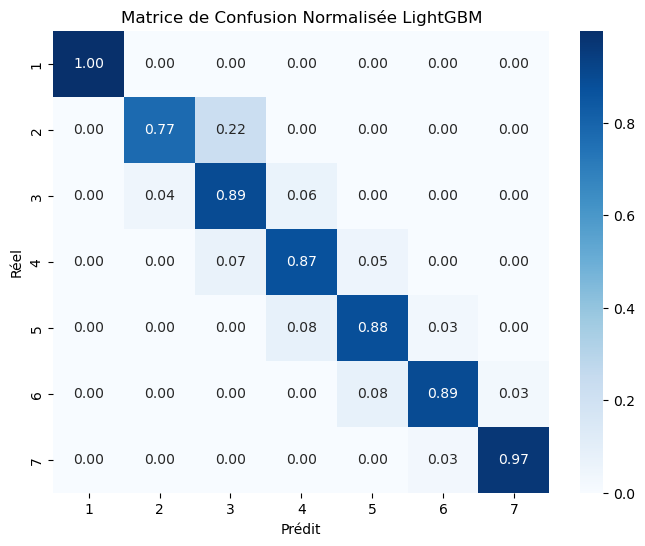

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculer la matrice de confusion et la normaliser (par ligne)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)  # Normalisation ligne par ligne

# Afficher la matrice de confusion normalisée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion Normalisée LightGBM")
plt.show()

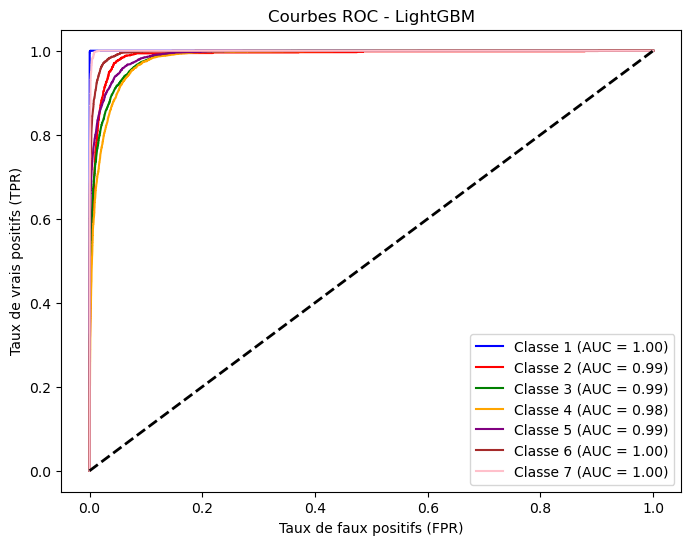

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Adapter les couleurs en fonction du nombre de classes
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink']

# COURBE ROC MULTICLASSES
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], label=f"Classe {i+1} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)  # Diagonale aléatoire
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title(f"Courbes ROC - LightGBM")
plt.legend()
plt.show()